# Exploration 5
# Find celebrities who look like me.


## |ÌîÑÎ°úÏ†ùÌä∏: ÎÇòÏôÄ ÎãÆÏùÄ Ïó∞ÏòàÏù∏ Ï∞æÍ∏∞
### |ÌîÑÎ°úÏ†ùÌä∏ ÌïôÏäµ Í≥ºÏ†ï
1. ÏÇ¨ÏßÑ Î™®ÏúºÍ∏∞
2. ÏñºÍµ¥ ÏòÅÏó≠ ÏûêÎ•¥Í∏∞
3. ÏñºÍµ¥ ÏòÅÏó≠Ïùò ÏûÑÎ≤†Îî© Ï∂îÏ∂úÌïòÍ∏∞
- def get_face_embedding(face)
- def get_face_embedding_dict(dir_path)
4. ÏñºÍµ¥ ÏûÑÎ≤†Îî© ÏÇ¨Ïù¥Ïùò Í±∞Î¶¨ Ï∏°Ï†ï(Î™®ÏùÄ Ïó∞ÏòàÏù∏Îì§Í≥º ÎπÑÍµêÌïòÍ∏∞)
5. Í≤∞Í≥º ÌôïÏù∏
6. Îã§ÏñëÌïú Ïû¨ÎØ∏ÏûàÎäî ÏãúÍ∞ÅÌôî ÏãúÎèÑÌï¥Î≥¥Í∏∞

# 1. ÏÇ¨ÏßÑ Î™®ÏúºÍ∏∞
- Ïó∞ÏòàÏù∏ ÏÇ¨ÏßÑÏùÑ Î™®ÏïÑÏÑú Í≤ΩÎ°ú '~/aiffel/face_imbedding/img' Ìè¥ÎçîÏóê Ï†ÄÏû•
- Ïù¥ÎØ∏ÏßÄ Ï§ë ÏñºÍµ¥Îßå cropÌï¥ÏÑú ÏûòÎùºÏ£ºÍ∏∞
- ÏûêÎ•∏ Ïù¥ÎØ∏ÏßÄÎäî PIL Image(Image.fromarray)Î°ú Î≥ÄÌôòÌïú Îí§Ïóê Ï†ÄÏû•ÌïòÍ∏∞

file_list counts: 2090
file_list: ['ÏßÄÏïÑ.jpg', 'Ïú†ÎØºÍ∑ú.jpg', 'Ïò§Ïù∏Ìòú.jpg', 'Ï∞®Ï£ºÏòÅ.jpg', 'ÍπÄÎ≥ëÍ∏∞.jpg']


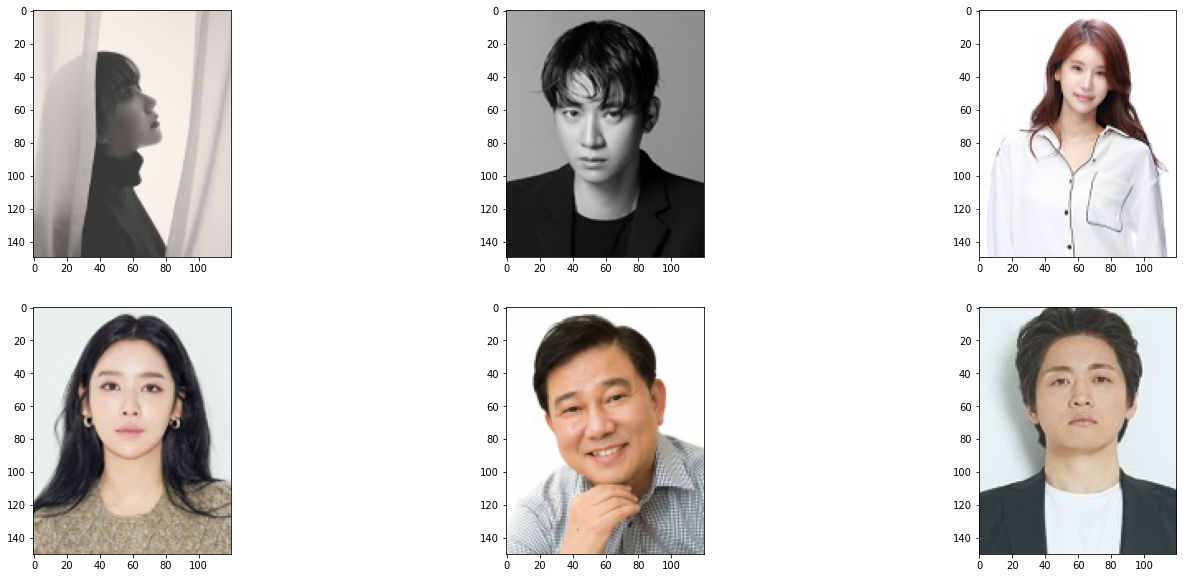

In [142]:
%matplotlib inline
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as img
import face_recognition
from PIL import Image

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/img/'
file_list = os.listdir(dir_path)

print ("file_list counts: {}".format(len(file_list)))
print ("file_list: {}".format(file_list[:5]))

# ÏÉòÌîå Ïù¥ÎØ∏ÏßÄ ÎØ∏Î¶¨ Î≥¥Í∏∞
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
    if i > 5:
        break
    image = img.imread(dir_path+'/'+file_list[i])
    ax.imshow(image)

plt.show()
fig.tight_layout()

# 2. ÏñºÍµ¥ ÏòÅÏó≠ ÏûêÎ•¥Í∏∞

- ÏòàÏãúÎ°ú Ï†ÄÎûë Ïù¥Î¶ÑÏù¥ ÎòëÍ∞ôÏùÄ 'Ï∞®ÏàòÏó∞' Ïù¥ÎØ∏ÏßÄÎ•º crop Ìï¥Î≥ºÍ≤åÏöî!ü§≠

[(118, 366, 304, 180)]


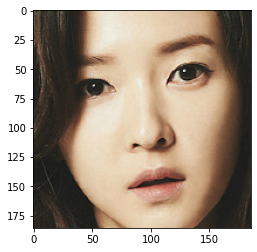

In [143]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/img/Ï∞®ÏàòÏó∞.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏñºÍµ¥ ÏòÅÏó≠Ïùò Ï¢åÌëúÎ•º Ï∂úÎ†•Ìï©ÎãàÎã§.

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏñºÍµ¥ÏòÅÏó≠Îßå ÏûòÎùºÎÇ∏ cropped_faceÎ•º Í∑∏Î†§ Î¥ÖÎãàÎã§.

- ÏñºÍµ¥ ÏòÅÏó≠ÏùÑ ÏûòÎùº Ï†ÄÏû•Ìï¥Ï£ºÎäî 'get_cropped_face(image_file)' Ìï®ÏàòÎ•º ÏÉùÏÑ±Ìï¥Î¥ÖÏãúÎã§!
- face_recognition.face_locationsÎäî ÏñºÍµ¥ÏùÑ Ï∞æÏïÑÏ§çÎãàÎã§.

In [144]:
def get_cropped_face(image_file):
    
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    
    if face_locations == []:
        return []
    
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

Ïù¥Î≤àÏóî Ìï®ÏàòÍ∞Ä Ïûò ÎêòÏóàÎäîÏßÄ Ï†ú Ïù¥ÎØ∏ÏßÄÎ°ú ÌôïÏù∏Ìï¥ Î¥ÖÏãúÎã§!

- Ïù¥Î¶ÑÏù¥ ÎòëÍ∞ôÏùÄ Ïó∞ÏòàÏù∏Ïù¥ ÏûàÏñ¥ÏÑú Ï†ú Ïù¥ÎØ∏ÏßÄÎäî 'ÏßÑÏßúÏ∞®ÏàòÏó∞', 'ÏßÑÏßúÏ∞®ÏàòÏó∞2'ÏúºÎ°ú Ï†ÄÏû•Ìï¥ÎëêÏóàÏäµÎãàÎã§.üòÜ

[(118, 366, 304, 180)]


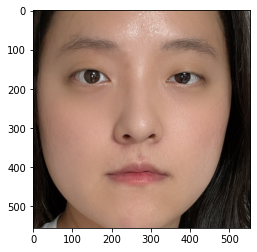

In [145]:
# Ï†ú ÏÇ¨ÏßÑÏùÑ crop ÏãúÎèÑÌï¥Î¥ÖÎãàÎã§.

my_path = os.path.join(dir_path, 'ÏßÑÏßúÏ∞®ÏàòÏó∞.jpg')

my_face = get_cropped_face(my_path)
print(face_locations)
plt.imshow(my_face)

- (ÏÜîÏßÅÌûà Ï¢Ä ÌîºÍ≥§ÌïòÍ∏¥ ÌñàÏäµÎãàÎã§...)

[(118, 366, 304, 180)]


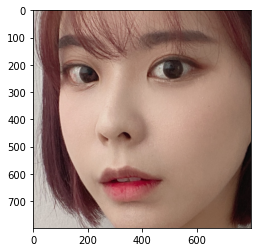

In [146]:
my_sister = os.path.join(dir_path, 'Ï∞®ÏàòÎπà.jpg')

my_sis = get_cropped_face(my_sister)
print(face_locations)
plt.imshow(my_sis)

- Ïñ∏ÎãàÏôÄ ÎãÆÏïòÎã§Í≥† ÎÇòÏò¨ÏßÄ Í∂ÅÍ∏àÌï¥ÏÑú ÏÇ¨ÏßÑÏùÑ Ìïú Ïû• Îã¨ÎùºÍ≥† ÌñàÏäµÎãàÎã§! Í∞ÄÏ¶àÏïÑ~

# 3. ÏñºÍµ¥ ÏòÅÏó≠Ïùò ÏûÑÎ≤†Îî© Ï∂îÏ∂úÌïòÍ∏∞
- def get_face_embedding(face)
- def get_face_embedding_dict(dir_path)

## 1) ÏñºÍµ¥ ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Î•º Íµ¨ÌïòÎäî Ìï®Ïàò
- def get_face_embedding(face)

In [148]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(my_face)  
embedding

[array([-0.08777208,  0.05697   ,  0.03992429, -0.10292044, -0.09995047,
        -0.07262765, -0.06450206, -0.12267142,  0.12384905, -0.19385034,
         0.15284841, -0.07126844, -0.21325096, -0.07377476, -0.06915116,
         0.24888395, -0.15156171, -0.15422601, -0.00874749,  0.01155018,
         0.09787329,  0.07851215, -0.019464  ,  0.07378186, -0.10708951,
        -0.30074456, -0.10479905, -0.05878446, -0.00709768, -0.00377285,
        -0.04970115,  0.06701142, -0.16304821,  0.00608017,  0.056661  ,
         0.12252156,  0.02895064, -0.04734081,  0.17118475,  0.08819868,
        -0.30825076,  0.06956246,  0.0619374 ,  0.25037512,  0.16897665,
         0.01139334,  0.03556337, -0.1596193 ,  0.16747166, -0.20746155,
         0.0207906 ,  0.09979151,  0.05695686,  0.018399  ,  0.03141266,
        -0.1416533 ,  0.092096  ,  0.08166953, -0.19672196,  0.03238367,
         0.13265136, -0.08129783, -0.03761601, -0.0322343 ,  0.19809514,
         0.04329087, -0.12843332, -0.22016388,  0.1

In [149]:
# Ìïú Î≤à Îçî Ïûò ÏûÑÎ≤†Îî© ÎêòÎäîÏßÄ ÌôïÏù∏Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§.

embedding = get_face_embedding(cropped_face)  
embedding

[array([-0.08462789,  0.09620072,  0.01825897, -0.07224959, -0.12530506,
        -0.04669834, -0.09467853, -0.14568326,  0.10014018, -0.17234467,
         0.17533416, -0.09788799, -0.22106998, -0.03876986, -0.03753022,
         0.25242177, -0.17203067, -0.16085809, -0.04593283, -0.00087958,
         0.04307693,  0.05376481, -0.04109439,  0.08872876, -0.02321022,
        -0.32293674, -0.08534414, -0.01840301, -0.03076187, -0.01634901,
        -0.08801316,  0.11751095, -0.141424  , -0.01418938,  0.05880436,
         0.11559444,  0.04947287, -0.04909536,  0.12461483,  0.01529684,
        -0.30665988,  0.10835351,  0.16911042,  0.25848684,  0.18803239,
         0.00277939, -0.02162724, -0.16235623,  0.12344281, -0.15781452,
         0.02244185,  0.11885977,  0.08346358,  0.04848497,  0.04852441,
        -0.15974629,  0.05158619,  0.06780452, -0.15841377, -0.00618987,
         0.15097579, -0.09198595, -0.00730537, -0.15198438,  0.19607374,
         0.08891033, -0.0731761 , -0.27792773,  0.0

In [150]:
embedding = get_face_embedding(my_sis)  
embedding

[array([-3.53020094e-02,  8.36655647e-02,  2.63253469e-02, -1.42236799e-01,
        -8.58245119e-02, -1.07740182e-02, -1.19356148e-01, -7.66901746e-02,
         1.16375387e-01, -1.81743801e-01,  2.04432309e-01, -1.52998328e-01,
        -2.64343262e-01, -2.77880928e-04, -8.67321789e-02,  2.11418763e-01,
        -1.29906192e-01, -1.81594416e-01, -4.01558727e-02,  5.26254512e-02,
         1.35102898e-01,  2.67875418e-02, -2.49168673e-03,  8.89486074e-02,
        -5.19967526e-02, -3.20319325e-01, -1.43175006e-01, -4.71841954e-02,
        -2.32566036e-02, -1.47593737e-01, -3.69812176e-02, -4.07782942e-03,
        -2.10069120e-01, -4.00930643e-04, -3.07694264e-03,  7.52376914e-02,
        -1.81452297e-02, -1.49322614e-01,  1.75263345e-01,  4.00954261e-02,
        -3.37037295e-01,  8.11041817e-02,  3.84783298e-02,  2.41925344e-01,
         1.36953637e-01,  2.07574926e-02, -2.01878361e-02, -1.78555861e-01,
         8.78690779e-02, -1.83382675e-01,  7.62932599e-02,  1.59542635e-01,
         7.4

In [151]:
len(embedding[0])

128

- ÏñºÍµ¥ ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïùò Ï∞®ÏõêÏàòÏôÄ Face_recognition Ìå®ÌÇ§ÏßÄÏóêÏÑú Ï†úÍ≥µÌïòÎäî ÏñºÍµ¥ ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïùò Ï∞®ÏõêÏàòÎäî 128Ï∞®ÏõêÏúºÎ°ú ÎèôÏùºÌï©ÎãàÎã§.

## 2) Î™®Îì† Ïù¥ÎØ∏ÏßÄÏùò ÏûÑÎ≤†Îî© ÎîïÏÖîÎÑàÎ¶¨ Íµ¨ÌïòÍ∏∞
- img ÎîîÎ†âÌÜ†Î¶¨ ÏïàÏùò Î™®Îì† Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏûÑÎ≤†Îî©ÏùÑ Íµ¨Ìï¥ dict Íµ¨Ï°∞Ïóê Îã¥ÏïÑ Î¶¨ÌÑ¥ÌïòÎäî Ìï®Ïàò
- ÎîïÏÖîÎÑàÎ¶¨Ïùò Í∞Å ÏóòÎ¶¨Î®ºÌä∏Îäî {ÏÇ¨Îûå Ïù¥Î¶Ñ:ÏûÑÎ≤†Îî©Î≤°ÌÑ∞}
- Ìï®Ïàò Ïù¥Î¶ÑÏùÄ get_face_embedding_dict(dir_path)

In [152]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    not_found_face = []
    
    for file in tqdm(file_list):
        
        try:
            img_path = os.path.join(dir_path, file)
            face = get_cropped_face(img_path)
            embedding = get_face_embedding(face)
            
            if len(embedding) > 0:  
                embedding_dict[os.path.splitext(file)[0]] = embedding[0]

        except:
            not_found_face.append(file)

    return embedding_dict, not_found_face

embedding_dict, not_found_face = get_face_embedding_dict(dir_path)

print ("not found face: {} " .format(not_found_face[:10]))
print("ÏñºÍµ¥ÏùÑ Ï∞æÏßÄ Î™ªÌïú Ïù¥ÎØ∏ÏßÄ {}Í∞ú".format(len(not_found_face)))

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2090/2090 [07:22<00:00,  4.72it/s]

not found face: ['ÏßÄÏïÑ.jpg', '.ipynb_checkpoints', 'Ïù¥Ï§Ä.jpg', 'Ïã¨ÏùÄÍ≤Ω.jpg', 'Î∞ïÏ†ïÌïô.jpg', 'ÏµúÏö©Ï§Ä.jpg', 'ÍπÄÏú§ÏÑù.jpg', 'ÎÇ®Í∂ÅÎØº.jpg', 'Ïù¥Í¥ëÌïÑ.jpg', 'Í∞ïÎØºÍ≤Ω.jpg']
ÏñºÍµ¥ÏùÑ Ï∞æÏßÄ Î™ªÌïú Ïù¥ÎØ∏ÏßÄ 108Í∞ú


- PythonÏóêÏÑú tqdm ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Ïù¥Ïö©Ìïú ÏûëÏóÖÏßÑÌñâÎ•† ÌëúÏãú
- ÏûêÏÑ∏Ìïú ÏÑ§Î™Öüëâ **[tqdm](https://github.com/tqdm/tqdm)**

ÏñºÍµ¥ÏùÑ Ï∞æÏßÄ Î™ªÌïú Ïù¥ÎØ∏ÏßÄÎäî Ï¥ù **108**Í∞úÏù¥Î©∞, ÏòàÏãúÎ°úÎäî ÏßÄÏïÑ, Ïù¥Ï§Ä, Ïã¨ÏùÄÍ≤Ω... Îì±Ïù¥ ÏûàÎÑ§Ïöî! Í∑∏Î†áÍ≤å ÎßéÏßÄ ÏïäÏúºÎãà Ï∞∏Í≥†Ï∞® 108Í∞úÎ•º Î™®Îëê print Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [153]:
print ("not found face: {}".format(not_found_face))

not found face: ['ÏßÄÏïÑ.jpg', '.ipynb_checkpoints', 'Ïù¥Ï§Ä.jpg', 'Ïã¨ÏùÄÍ≤Ω.jpg', 'Î∞ïÏ†ïÌïô.jpg', 'ÏµúÏö©Ï§Ä.jpg', 'ÍπÄÏú§ÏÑù.jpg', 'ÎÇ®Í∂ÅÎØº.jpg', 'Ïù¥Í¥ëÌïÑ.jpg', 'Í∞ïÎØºÍ≤Ω.jpg', 'ÌÉÄÎ∏îÎ°ú.jpg', 'Í∞ïÏù¥Ï±Ñ.jpg', 'SE7EN.jpg', 'Î∞îÎπÑ ÌÇ¥.jpg', 'Î•òÏû¨ÌòÑ.jpg', 'Î¨∏ÏßÄÏùÄ.jpg', 'ÏÜåÎ™Ö.jpg', 'Ìà¨Ïª∑.jpg', 'Ìö®Ïó∞.jpg', 'ÍπÄÏÑ±Ïò§.jpg', 'ÌïúÏßÄÏïà.jpg', 'img.zip', 'Ïù¥Ï§ÄÏò§.jpg', 'ÍπÄÍ∑úÏ¢Ö.jpg', 'Ìó§Ïù¥Ï¶à.jpg', 'ÏÜêÍ∞ÄÏù∏.jpg', 'ÌïòÌòÑÏö∞.jpg', 'Ïù¥Ï£ºÏòÅ.jpg', 'Ï†ïÏ§ÄÏòÅ.jpg', 'Í≥µÏú†.jpg', 'Ïã¨Ìù¨ÏÑ≠.jpg', 'Ïù¥ÏùºÏû¨.jpg', 'ÍπÄÌù¨Ïï†.jpg', 'ÎÇòÎØ∏.jpg', 'Î¨∏Î™ÖÏßÑ.jpg', 'ÏÜêÏßÑÏòÅ.jpg', 'ÏÑúÌÉúÏßÄ.jpg', 'ÏÑúÍ∞ïÏ§Ä.jpg', 'Ïù¥Ìù¨ÏßÑ.jpg', 'Ïú†Ìò∏Î¶∞.jpg', 'ÏÑ±Ï§Ä.jpg', 'Î™ÖÍ≥ÑÎÇ®.jpg', 'Ïò§ÏäπÏú§.jpg', 'Ï£ºÌïôÎÖÑ.jpg', 'Ïù¥ÏùÄÌïò.jpg', 'Í∏∏ÌïôÎØ∏.jpg', 'Í∞ïÍ∑†ÏÑ±.jpg', 'ÎÇ®Í∑úÎ¶¨.jpg', 'ÍπÄÏö∞Îπà.jpg', 'Ï°∞ÌòÑÏû¨.jpg', 'Ï†ïÏàòÎùº.jpg', 'ÍπÄÏòÅÎåÄ.jpg', 'ÏßÑÏÑúÏó∞.jpg', 'Ïú§ÎØºÏàò.jpg', 'Ïú§ÏäπÏïÑ.jpg', 'ÏßÄÏù¥Ïàò.jpg', 'ÍπÄÌòïÏ§ë.jpg', 'Ï°∞Í∂å.jpg', 'ÍπÄÏ¢ÖÏôÑ.jpg', 'Ïù¥Í∞ÄÌù¨.

# 4. ÏñºÍµ¥ ÏûÑÎ≤†Îî© ÏÇ¨Ïù¥Ïùò Í±∞Î¶¨ Ï∏°Ï†ï
- Ïó∞ÏòàÏù∏ ÏÇ¨ÏßÑÍ≥º Î≥∏Ïù∏Ïùò ÏñºÍµ¥ ÏÇ¨ÏßÑÏóêÏÑú Ï∂îÏ∂úÌïú ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Îì§ Í∞ÑÏùò Í±∞Î¶¨(distance)Î•º ÎπÑÍµêÌï¥ Î≥¥Í≥† Í∞ÄÏû• ÏûëÏùÄ Ïó∞ÏòàÏù∏Ïù¥ ÎàÑÍµ¨Ïù∏ÏßÄ Ï∞æÏïÑÎ¥ÖÏãúÎã§.
- get_nearest_face(name, top=5) Ìï®Ïàò Ïù¥Ïö©!

ÏùºÎã® Ïù¥ÎØ∏ÏßÄÎ•º Face Detection Î™®Îç∏Î°ú ÎØ∏Î¶¨ ÏûòÎùºÎëêÏóàÏäµÎãàÎã§. Í∑∏Î¶¨Í≥† ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Í∞íÏùÑ ÎÑ£Ïñ¥ÎëêÏóàÏ£†. Î™®Îç∏Ïù¥ Ïûò Íµ¨Î∂ÑÌïòÎäîÏßÄ ÌïôÏäµÏùÑ ÌÜµÌï¥ ÏûÑÎ≤†Îî© Í∞ÑÏùò Í±∞Î¶¨Í∞Ä ÌôïÎ≥¥ÎêêÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§

In [154]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [155]:
get_distance('Í∞ïÎèôÏõê', 'Í≥†Ïàò')

0.5817290949438987

- ÎåÄÌïúÎØºÍµ≠ ÎåÄÌëú ÎØ∏ÎÇ® 'Í∞ïÎèôÏõê'Í≥º 'Í≥†Ïàò'Î•º ÎπÑÍµêÌï¥Î≥¥ÏïòÏäµÎãàÎã§. Í∞úÏù∏Ï†ÅÏúºÎ°ú ÎπÑÏä∑Ìïú Ïù∏ÏÉÅÏù¥Îùº ÏÉùÍ∞ÅÌï¥ÏÑú Í±∞Î¶¨Î•º Ï°∞ÌöåÌï¥ Î≥¥ÏïòÎäîÎç∞ Í±∞Î¶¨Í∞Ä 0.58 Ï†ïÎèÑÎ°ú ÎÇòÏò§ÎÑ§Ïöî!

In [156]:
get_distance('Í≥†ÏÜåÏòÅ', 'Ïù¥ÏòÅÏï†')

0.5396709862619241

- ÎåÄÌïúÎØºÍµ≠ ÎåÄÌëú ÎØ∏ÎÖÄ 'Í≥†ÏÜåÏòÅ'Í≥º 'Ïù¥ÏòÅÏï†'Î•º ÎπÑÍµêÌï¥Î≥¥ÏïòÏäµÎãàÎã§. Îëê Î∂ÑÏùÄ ÎßéÏù¥ Îã§Î•¥Îã§Í≥† ÌåêÎã®ÏùÑ ÌïòÎÑ§Ïöî. 0.72Í∞Ä ÎÇòÏôîÏäµÎãàÎã§!

In [157]:
get_distance('Ï∞®ÏàòÏó∞', 'ÏßÑÏßúÏ∞®ÏàòÏó∞')

0.42929149628584445

- Í∑∏Î¶¨Í≥† Íº≠ ÎèåÎ†§Î≥¥Í≥† Ïã∂ÏóàÎçò Ïó∞ÏòàÏù∏ Ï∞®ÏàòÏó∞Í≥º Í∑∏ÎÉ•(ÏßÑÏßú)Ï∞®ÏàòÏó∞Ïùò Í±∞Î¶¨ÏûÖÎãàÎã§! Ïñ¥Î®∏Î®∏, 0.42 Î∞ñÏóê ÎÇòÏò§ÏßÄ ÏïäÎÑ§Ïöî? ÏÉùÍ∞Å Ïô∏Ïùò Í≤∞Í≥ºÏûÖÎãàÎã§ü§≠

In [159]:
get_distance('Ï∞®ÏàòÏó∞', 'Ï∞®ÏàòÎπà')

0.5556848804063059

- ÏπúÏñ∏ÎãàÏôÄÏùò Í±∞Î¶¨Í∞Ä 0.55ÎßåÌÅº ÎÇòÏò§ÎÑ§Ïöî. Í≥†ÏÜåÏòÅÍ≥º Ïù¥ÏòÅÏï†Î•º ÎπÑÍµêÌñàÏùÑ ÎïåÎ≥¥Îã§ Îçî Ïïà ÎãÆÏïòÎã§Í≥† Îú®ÎÑ§Ïöî...

In [160]:
# name1Í≥º name2Ïùò Í±∞Î¶¨Î•º ÎπÑÍµêÌïòÎäî Ìï®ÏàòÎ•º ÏÉùÏÑ±
# name1ÏùÄ ÎØ∏Î¶¨ ÏßÄÏ†ïÌïòÍ≥†, name2Îäî Ìò∏Ï∂úÏãúÏóê Ïù∏ÏûêÎ°ú Î∞õÍ∏∞

def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('ÏßÑÏßúÏ∞®ÏàòÏó∞')   

# sort_key_funcÎäî sort_key_func('obama') ÎùºÍ≥† Ìò∏Ï∂úÌï† Îïå
# name 1Í≥º name 2 ÏÇ¨Ïù¥Ïùò ÏûÑÎ≤†Îî© Î≤°ÌÑ∞ Í±∞Î¶¨Î•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.

sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('ÏßÑÏßúÏ∞®ÏàòÏó∞',
  array([-0.08777208,  0.05697   ,  0.03992429, -0.10292044, -0.09995047,
         -0.07262765, -0.06450206, -0.12267142,  0.12384905, -0.19385034,
          0.15284841, -0.07126844, -0.21325096, -0.07377476, -0.06915116,
          0.24888395, -0.15156171, -0.15422601, -0.00874749,  0.01155018,
          0.09787329,  0.07851215, -0.019464  ,  0.07378186, -0.10708951,
         -0.30074456, -0.10479905, -0.05878446, -0.00709768, -0.00377285,
         -0.04970115,  0.06701142, -0.16304821,  0.00608017,  0.056661  ,
          0.12252156,  0.02895064, -0.04734081,  0.17118475,  0.08819868,
         -0.30825076,  0.06956246,  0.0619374 ,  0.25037512,  0.16897665,
          0.01139334,  0.03556337, -0.1596193 ,  0.16747166, -0.20746155,
          0.0207906 ,  0.09979151,  0.05695686,  0.018399  ,  0.03141266,
         -0.1416533 ,  0.092096  ,  0.08166953, -0.19672196,  0.03238367,
          0.13265136, -0.08129783, -0.03761601, -0.0322343 ,  0.19809514,
          0.04329

In [162]:
def get_nearest_face(name, top=6):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   
            continue
        # Ï≤´Î≤àÏß∏Î°ú ÎÇòÏò§Îäî Ïù¥Î¶ÑÏùÄ ÏûêÍ∏∞ ÏûêÏã†Ïùº Í≤ÉÏù¥ÎØÄÎ°ú Ï†úÏô∏
        elif sorted_faces[i][0].startswith('ÏßÑÏßúÏ∞®ÏàòÏó∞'):   
            continue 
        # ÌïòÎÇòÏùò Îã§Î•∏ Ïù¥ÎØ∏ÏßÄÍ∞Ä Îòê Ï∂úÎ†•ÎêòÎØÄÎ°ú Î≥∏Ïù∏ Ïù¥ÎØ∏ÏßÄ ÎòêÌïú Ï†úÏô∏
        if sorted_faces[i]:
            print('ÏàúÏúÑ {} : Ïù¥Î¶Ñ({}), Í±∞Î¶¨({})'.format(i-1, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [163]:
# Ï†ÄÏôÄ Í∞ÄÏû• ÎãÆÏùÄ ÏÇ¨ÎûåÏùÄ ÎàÑÍµ¥ÍπåÏöî?
nearest_me = get_nearest_face('ÏßÑÏßúÏ∞®ÏàòÏó∞')
nearest_me

ÏàúÏúÑ 1 : Ïù¥Î¶Ñ(ÏµúÏòàÎπà), Í±∞Î¶¨(0.36365641053201814)
ÏàúÏúÑ 2 : Ïù¥Î¶Ñ(Ïó∞Ïö∞), Í±∞Î¶¨(0.38089730477768396)
ÏàúÏúÑ 3 : Ïù¥Î¶Ñ(Ïã†ÏùÄÏàò), Í±∞Î¶¨(0.38790816152416846)
ÏàúÏúÑ 4 : Ïù¥Î¶Ñ(ÍπÄÏù∏Ïù¥), Í±∞Î¶¨(0.3899690930893757)
ÏàúÏúÑ 5 : Ïù¥Î¶Ñ(Ïù¥ÌòÑÏ£º), Í±∞Î¶¨(0.3906966773006036)


In [164]:
# Ï†ÄÏôÄ Í∞ÄÏû• ÎãÆÏùÄ ÏÇ¨ÎûåÏùÄ ÎàÑÍµ¥ÍπåÏöî?
nearest_me2 = get_nearest_face('ÏßÑÏßúÏ∞®ÏàòÏó∞2')
nearest_me2

ÏàúÏúÑ 1 : Ïù¥Î¶Ñ(ÏµúÏòàÎπà), Í±∞Î¶¨(0.3531319847900596)
ÏàúÏúÑ 2 : Ïù¥Î¶Ñ(Ïó∞Ïö∞), Í±∞Î¶¨(0.37409824835249467)
ÏàúÏúÑ 3 : Ïù¥Î¶Ñ(Î∞ïÍ∑úÏòÅ), Í±∞Î¶¨(0.3929261770742972)
ÏàúÏúÑ 4 : Ïù¥Î¶Ñ(Ïù¥ÌòÑÏ£º), Í±∞Î¶¨(0.39407333660186844)
ÏàúÏúÑ 5 : Ïù¥Î¶Ñ(ÌôçÎèôÏòÅ), Í±∞Î¶¨(0.3955932927722376)


In [166]:
my_sister = get_nearest_face('Ï∞®ÏàòÎπà')

ÏàúÏúÑ 0 : Ïù¥Î¶Ñ(Í≤ΩÏàòÏßÑ), Í±∞Î¶¨(0.33663106473832743)
ÏàúÏúÑ 1 : Ïù¥Î¶Ñ(Í∞ïÎëêÎ¶¨), Í±∞Î¶¨(0.3677321787066357)
ÏàúÏúÑ 2 : Ïù¥Î¶Ñ(Ïú†ÏÑúÏßÑ), Í±∞Î¶¨(0.3858199570646458)
ÏàúÏúÑ 3 : Ïù¥Î¶Ñ(Î∞∞Ïú§Í≤Ω), Í±∞Î¶¨(0.3886077143034404)
ÏàúÏúÑ 4 : Ïù¥Î¶Ñ(Ïú†Ïù∏ÏòÅ), Í±∞Î¶¨(0.3899483537100305)
ÏàúÏúÑ 5 : Ïù¥Î¶Ñ(Ïú§Î≥¥Îùº), Í±∞Î¶¨(0.4016527377486985)


# 5. Í≤∞Í≥º ÌôïÏù∏

#### 1. ÏßÑÏßúÏ∞®ÏàòÏó∞Ïùò Í≤ΩÏö∞, Í∞ÄÏû• ÎãÆÏùÄ ÏÇ¨ÎûåÏùÄ?

|ÏàúÏúÑ|Ïù¥Î¶Ñ|Í±∞Î¶¨|
|---|-----|-----|
|1|ÏµúÏòàÎπà|0.36365641053201814|
|2|Ïó∞Ïö∞|0.38089730477768396|
|3|Ïã†ÏùÄÏàò|0.38790816152416846|
|4|ÍπÄÏù∏Ïù¥|0.3899690930893757|
|5|Ïù¥ÌòÑÏ£º|0.3906966773006036|

#### 2. ÏßÑÏßúÏ∞®ÏàòÏó∞2Ïùò Í≤ΩÏö∞, Í∞ÄÏû• ÎãÆÏùÄ ÏÇ¨ÎûåÏùÄ?

|ÏàúÏúÑ|Ïù¥Î¶Ñ|Í±∞Î¶¨|
|---|-----|-----|
|1|ÏµúÏòàÎπà|0.3531319847900596|
|2|Ïó∞Ïö∞|0.37409824835249467|
|3|Î∞ïÍ∑úÏòÅ|0.3929261770742972|
|4|Ïù¥ÌòÑÏ£º|0.39407333660186844|
|5|ÌôçÎèôÏòÅ|0.3955932927722376|

<br/>
<br/>
- Ïã†Í∏∞ÌïòÍ≤åÎèÑ 1, 2ÏúÑÍπåÏßÄÎäî ÎèôÏùºÌïú Ïù∏Î¨ºÏù¥Í≥†, 3~5ÏúÑÏóêÎßå ÏïΩÍ∞ÑÏùò Î≥ÄÎèôÏù¥ ÏûàÎÑ§Ïöî
- ÏïÑÍπå ÏπúÏñ∏ÎãàÏôÄÏùò Í±∞Î¶¨Îäî 0.58 Ï†ïÎèÑÏù∏ Í≤ÉÏùÑ ÌôïÏù∏ÌñàÏùÑ Îïå, ÏàúÏúÑÍ∂åÏùò Ìõ®Ïî¨ Î∞ñÏûÑÏùÑ Ïïå Ïàò ÏûàÎÑ§Ïöî

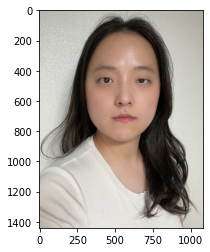

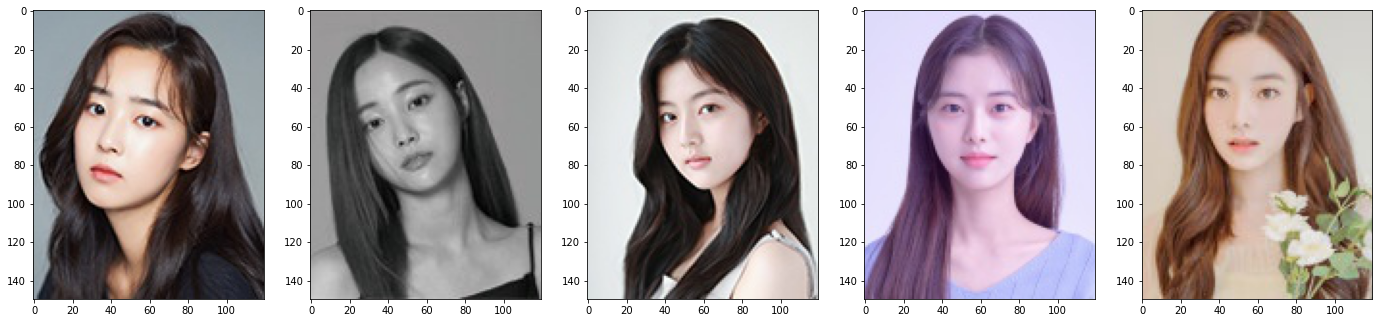

In [165]:
image = img.imread(dir_path+'ÏßÑÏßúÏ∞®ÏàòÏó∞.jpg')
plt.imshow(image)
nearest_me = ['ÏµúÏòàÎπà', 'Ïó∞Ïö∞', 'Ïã†ÏùÄÏàò', 'ÍπÄÏù∏Ïù¥', 'Ïù¥ÌòÑÏ£º']

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(24,10))

for i, ax in enumerate(axes.flatten()):
    image = img.imread(dir_path+nearest_me[i]+".jpg")
    ax.imshow(image)
    
plt.show()

fig.tight_layout()

- ÎãÆÏùÄÍº¥ Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•ÏùÑ Î∞îÎ°ú Ìï† Ïàò ÏûàÍ≤åÎÅî Ìï®ÏàòÎ•º ÎßåÎì§Í≥† Ïã∂ÏóàÎäîÎç∞, Í≥ÑÏÜçÎêú Ïã§Ìå®Î°ú üò≠ ÏùºÎã®ÏùÄ Ïñ¥Ï©î Ïàò ÏóÜÏù¥ Î¶¨Ïä§Ìä∏Î•º ÎßåÎì§Ïñ¥ÏÑú Ï∂úÎ†•Ìï¥Î≥¥ÏïòÏäµÎãàÎã§. ÏÇ¨ÏßÑÏùÑ Î≥¥Îãà Ï†ÑÌòÄ ÎãÆÏßÄ ÏïäÏùÄ Í≤É Í∞ôÎÑ§Ïöî.

# 6. Îã§ÏñëÌïú ÏãúÍ∞ÅÌôî ÎèÑÏ†Ñ

- Îã§ÏñëÌïú ÏãúÍ∞ÅÌôîÎäî ÎßéÏùÄ ÏûêÎ£åÎ•º Ï∞æÏïÑ Î≥¥ÏïòÎäîÎç∞, ÏïÑÏßÅ Îî∞ÎùºÌïòÍ∏∞ Ï¢Ä Ïñ¥Î†§ÏõåÏÑú passÌï¥Ïïº Ìï† Í≤É Í∞ôÏäµÎãàÎã§

# 7. Ïù¥Î≤à ÌîÑÎ°úÏ†ùÌä∏Î°ú ÎäêÎÇÄ Ï†ê

- ÎßéÏùÄ ÏãúÌñâ Ï∞©Ïò§Î•º ÌÜµÌï¥ ÏïÑÏßÅ ÏΩîÎî© Ïã§Î†•Ïù¥ Î∂ÄÏ°±ÌïòÎã§Îäî Ï†êÏùÑ ÎßéÏù¥ ÎäêÍºàÍ≥†, Î®∏Ïã†Îü¨Îãù/Îî•Îü¨Îãù Ïù¥Î°† Ïù¥Ìï¥ÏôÄ Ïã§ÏäµÎèÑ Ï§ëÏöîÌïòÏßÄÎßå ÌååÏù¥Ïç¨Ïùò Í∏∞Ï¥àÎ•º Îã¶ÎäîÎç∞ Îçî ÏßëÏ§ëÌï¥Ïïº Ìï† ÌïÑÏöîÎèÑ ÏûàÏùåÏùÑ ÎäêÍºàÏäµÎãàÎã§.
- Ïû¨ÎØ∏ÏûàÎäî ÌîÑÎ°úÏ†ùÌä∏Î•º ÌÜµÌï¥ Ïù¥Î≤àÏóêÎèÑ Ï¶êÍ≤ÅÍ≤å ÌïòÏòÄÍ≥†, Îã§ÏùåÏóî CNN Î™®Îç∏ÏùÑ Ïù¥Ïö©Ìï¥ Îçî Ïã¨ÌöåÏ†ÅÏúºÎ°ú Ïã§ÏäµÌï¥Î≥¥Í≥† Ïã∂ÏäµÎãàÎã§.

Í≥µÎ∂ÄÌï¥Î≥º Í≤É

- FaceNet ÎÖºÎ¨∏ [Îã§Ïö¥Î°úÎìú](https://arxiv.org/abs/1503.03832)

Ïó¥Ïã¨Ìûà ÎèåÏïÑÎã§ÎãàÎ©∞ ÏïåÍ≤å Îêú, FaceNet. Ïù¥Î≤à Ex5 ÎÖ∏ÎìúÏóê ÎÇòÏò§Îäî ÎÇ¥Ïö©ÎèÑ Îì§Ïñ¥Í∞Ä ÏûàÍ≥†, Ïñ¥Î†µÍ≤†ÏßÄÎßå Ï≤úÏ≤úÌûà ÎúØÏñ¥ Î≥¥Î©¥ Ï¢ãÏùÑ ÎìØ ÌïòÎã§!